In [1]:
import gym
from tqdm import tqdm
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import cv2
from gym.envs.toy_text.frozen_lake import generate_random_map
from hiive.mdptoolbox.mdp import PolicyIteration, ValueIteration, QLearning, PolicyIterationModified
from hiive.mdptoolbox.example import forest, rand

In [2]:
save_folder = "../images/forest/"

In [3]:

fm_size = 1000 
trans, rewards = forest(S=fm_size)

In [178]:
# trans, rewards =rand(1000,4)

In [185]:
gamma = 0.995
vi = ValueIteration(trans, rewards, gamma,max_iter=500)
vi.run()
time = vi.time
meanV = np.mean(vi.V)    
iters = vi.iter

pi = PolicyIteration(trans, rewards, gamma,max_iter=500)
pi.run()
pi_time = pi.time

vi_mean_v = [stats["Mean V"] for stats in vi.run_stats]
vi_dQ = [stats["Error"] for stats in vi.run_stats]
vi_rewards_stats = [stats["Reward"] for stats in vi.run_stats]
vi_Iterations = [stats["Iteration"] for stats in vi.run_stats]
vi_time = [stats["Time"] for stats in vi.run_stats]

pi_mean_v = [stats["Mean V"] for stats in pi.run_stats]
pi_dQ = [stats["Error"] for stats in pi.run_stats]
pi_rewards_stats = [stats["Reward"] for stats in pi.run_stats]
pi_Iterations = [stats["Iteration"] for stats in pi.run_stats]
pi_time = [stats["Time"] for stats in pi.run_stats]



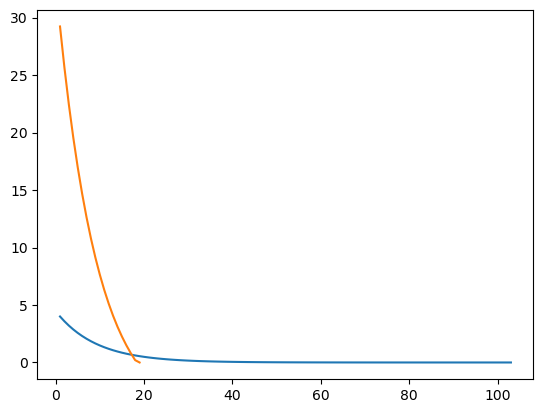

In [166]:
plt.plot(vi_Iterations,vi_dQ)
plt.plot(pi_Iterations,pi_dQ)

In [172]:
0.01*(1-0.999)/0.999

1.001001001001002e-05

In [53]:
vistats = []
pistats = []
max_iter = 1000
gammas = np.arange(0.11, 1.0, 0.04)

for gamma in gammas:
    np.random.seed(0)
    vi = ValueIteration(trans, rewards, gamma,max_iter=max_iter)
    vi.run()
    time = vi.time
    meanV = np.mean(vi.V)    
    iters = vi.iter
    vistats.append(['VI', fm_size, gamma, time, meanV, iters])
    
    pi = PolicyIteration(trans, rewards, gamma,max_iter=max_iter)
    pi.run()
    time = pi.time
    meanV = np.mean(pi.V)    
    iters = pi.iter
    pistats.append(['PI', fm_size, gamma, time, meanV, iters])

    

    

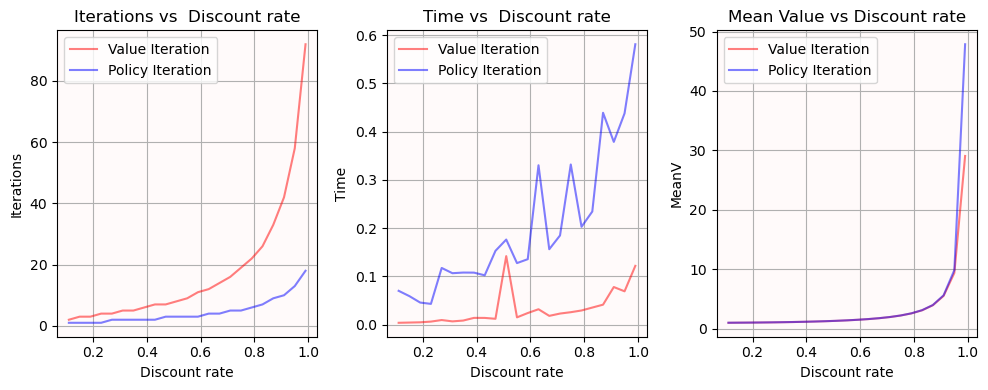

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
dfvi = pd.DataFrame(vistats, columns=['Type', 'Size', 'Discount rate',  'Time', 'MeanV',  'Iterations'])
dfpi = pd.DataFrame(pistats, columns=['Type', 'Size', 'Discount rate',  'Time', 'MeanV',  'Iterations'])

sns.lineplot(x=dfvi['Discount rate'], y=dfvi['Iterations'], label = "Value Iteration", ax=axs[0], alpha=0.5, color='red')
sns.lineplot(x=dfpi['Discount rate'], y=dfpi['Iterations'], label = "Policy Iteration", ax=axs[0], alpha=0.5, color='blue')

axs[0].set_title('Iterations vs  Discount rate')

sns.lineplot(x=dfvi['Discount rate'], y=dfvi['Time'], label = "Value Iteration", ax=axs[1], alpha=0.5, color='red')
sns.lineplot(x=dfpi['Discount rate'], y=dfpi['Time'], label = "Policy Iteration", ax=axs[1], alpha=0.5, color='blue')
axs[1].set_title('Time vs  Discount rate')

sns.lineplot(x=dfvi['Discount rate'], y=dfvi['MeanV'], label = "Value Iteration", ax=axs[2], alpha=0.5, color='red')
sns.lineplot(x=dfpi['Discount rate'], y=dfpi['MeanV'], label = "Policy Iteration", ax=axs[2], alpha=0.5, color='blue')
axs[2].set_title('Mean Value vs Discount rate')

for ax in axs.flat:
    ax.legend(loc='best')
    ax.grid()
    ax.set_facecolor("snow")
    
fig.tight_layout()

# fig.savefig(save_folder+"fr_gmma.pdf")


In [148]:
# vistats = []
# pistats = []

# gamma = 0.99
# epsilons = np.arange(0.05,0.5, 0.05)
# for epsilon in epsilons:
#     np.random.seed(0)
#     vi = ValueIteration(trans, rewards, gamma, epsilon=epsilon)
#     vi.run()
#     time = vi.time
#     meanV = np.mean(vi.V)    
#     iters = vi.iter
#     vistats.append(['VI', fm_size, epsilon, time, meanV, iters])


#     pi = PolicyIterationModified(trans, rewards, gamma, epsilon=epsilon)
#     pi.run()
#     time = pi.time
#     meanV = np.mean(pi.V)    
#     iters = pi.iter
#     pistats.append(['PI', fm_size, epsilon, time, meanV, iters])



In [149]:
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

# dfvi = pd.DataFrame(vistats, columns=['Type', 'Size', 'Epsilon',  'Time', 'MeanV', 'Iterations'])
# dfpi = pd.DataFrame(pistats, columns=['Type', 'Size', 'Epsilon',  'Time', 'MeanV', 'Iterations'])

# sns.lineplot(x=dfvi['Epsilon'], y=dfvi['Iterations'], label = "Value Iteration", ax=axs[0], alpha=0.5, color='red')
# sns.lineplot(x=dfpi['Epsilon'], y=dfpi['Iterations'], label = "Policy Iteration", ax=axs[0], alpha=0.5, color='blue')
# axs[0].set_title('Iterations vs Epsilon')

# sns.lineplot(x=dfvi['Epsilon'], y=dfvi['Time'], label = "Value Iteration", ax=axs[1], alpha=0.5, color='red')
# sns.lineplot(x=dfpi['Epsilon'], y=dfpi['Time'], label = "Policy Iteration", ax=axs[1], alpha=0.5, color='blue')
# axs[1].set_title('Time vs Epsilon')

# sns.lineplot(x=dfvi['Epsilon'], y=dfvi['MeanV'], label = "Value Iteration", ax=axs[2], alpha=0.5, color='red')
# sns.lineplot(x=dfpi['Epsilon'], y=dfpi['MeanV'], label = "Policy Iteration", ax=axs[2], alpha=0.5, color='blue')
# axs[2].set_title('Mean Value vs Epsilon')

# for ax in axs.flat:
#     ax.legend(loc='best')
#     ax.set_facecolor("snow")
#     ax.grid()
#     ax.ticklabel_format(style='plain', axis='y',useOffset=False)
    
# fig.tight_layout()

0.9900497842463927

In [172]:
vi_maxs = []
vi_iters = []
pi_maxs = []
pi_iters = []
for p in [0.001,0.01,0.1]:
    vi_max = []
    vi_iter = []
    pi_max = []
    pi_iter = []

    sizes = range(10, 1000, 10)
    gamma = 0.99
    for sz in tqdm(sizes):
        trans, rewards = forest(S=sz,p=p)
                
        vi = ValueIteration(trans, rewards, gamma)
        vi.run()
        time = vi.time
        maxV = np.amax(vi.V)    
        vi_iter.append( vi.iter)
        vi_max.append(maxV)        

        pi = PolicyIterationModified(trans, rewards, gamma)
        pi.run()
        time = pi.time
        maxV = np.amax(pi.V)    
        pi_iter.append( pi.iter)
        pi_max.append(maxV)      
    
    vi_maxs.append(vi_max)
    vi_iters.append(vi_iter)
    pi_maxs.append(pi_max)
    pi_iters.append(pi_iter)


100%|██████████| 99/99 [00:15<00:00,  6.46it/s]


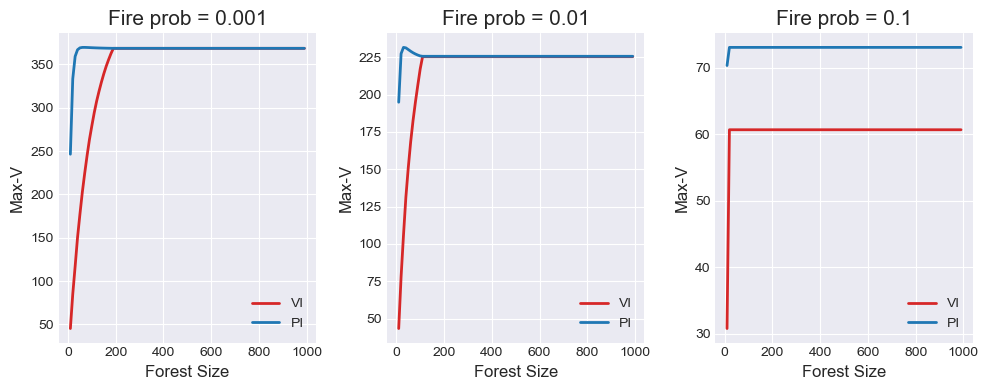

In [173]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

for i in range(3):
    axs[i].plot(sizes,vi_maxs[i],color="tab:red",linewidth=2,label="VI")
    axs[i].plot(sizes,pi_maxs[i],color="tab:blue",linewidth=2,label="PI")
    axs[i].legend()

axs[0].set_xlabel('Forest Size', fontsize=12)
axs[0].set_ylabel('Max-V', fontsize=12)
axs[0].set_title('Fire prob = 0.001', fontsize=15)

axs[1].set_xlabel('Forest Size', fontsize=12)
axs[1].set_ylabel('Max-V', fontsize=12)
axs[1].set_title('Fire prob = 0.01', fontsize=15)

axs[2].set_xlabel('Forest Size', fontsize=12)
axs[2].set_ylabel('Max-V', fontsize=12)
axs[2].set_title('Fire prob = 0.1', fontsize=15)

plt.tight_layout()


In [307]:
vi_policies = []
pi_policies = []
gammas = [0.99,0.9999]
for p in tqdm([0.001,0.01,0.1]):
    vi_policies_gammas = []
    pi_policies_gammas = []
    for gamma in gammas:
        trans, rewards = forest(S=1000,p=p)
                
        vi = ValueIteration(trans, rewards, gamma)
        vi.run()
        vi_policies_gammas.append(vi.policy)

        pi = PolicyIterationModified(trans, rewards, gamma)
        pi.run()
        pi_policies_gammas.append(pi.policy)
             
    
    vi_policies.append(vi_policies_gammas)
    pi_policies.append(pi_policies_gammas)



100%|██████████| 3/3 [00:40<00:00, 13.65s/it]


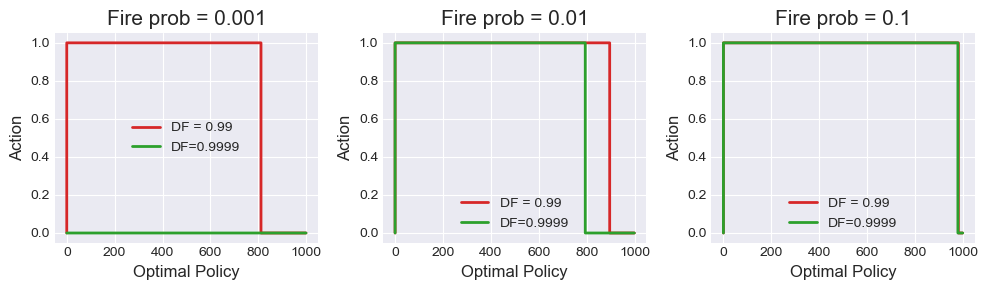

In [308]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
colors =["tab:red","tab:green"]
labels = ["DF = 0.99","DF=0.9999"]
for j in range(len(vi_policies)):
    for i in range(len(gammas)):
        axs[j].step(np.arange(1000),vi_policies[j][i],color=colors[i],linewidth=2,label=labels[i])
        axs[j].legend()

axs[0].set_xlabel('Optimal Policy', fontsize=12)
axs[0].set_ylabel('Action', fontsize=12)
axs[0].set_title('Fire prob = 0.001', fontsize=15)

axs[1].set_xlabel('Optimal Policy', fontsize=12)
axs[1].set_ylabel('Action', fontsize=12)
axs[1].set_title('Fire prob = 0.01', fontsize=15)

axs[2].set_xlabel('Optimal Policy', fontsize=12)
axs[2].set_ylabel('Action', fontsize=12)
axs[2].set_title('Fire prob = 0.1', fontsize=15)

plt.tight_layout()
plt.savefig(save_folder+"optimal_policy_gamma_p.pdf")


In [82]:
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [78]:
gamma = 0.99
vi = ValueIteration(trans, rewards, gamma)
vi.run()
time = vi.time
meanV = np.mean(vi.V)    
iters = vi.iter

pi = PolicyIterationModified(trans, rewards, gamma)
pi.run()
pi_time = pi.time

print(np.mean(vi.V))
print(vi.iter)
print(np.mean(pi.V))
print(pi.iter)
print(vi.policy==pi.policy)

29.06545752710347
92
41.44496909670856
19
True


In [239]:
gamma = 0.99
vi = ValueIteration(trans, rewards, gamma)
vi.run()
time = vi.time
meanV = np.mean(vi.V)    
iters = vi.iter

pi = PolicyIteration(trans, rewards, gamma,run_stat_frequency=1)
pi.run()
pi_time = pi.time

vi_mean_v = [stats["Mean V"] for stats in vi.run_stats]
vi_dQ = [stats["Error"] for stats in vi.run_stats]
vi_rewards_stats = [stats["Reward"] for stats in vi.run_stats]
vi_Iterations = [stats["Iteration"] for stats in vi.run_stats]
vi_time = [stats["Time"] for stats in vi.run_stats]

pi_mean_v = [stats["Mean V"] for stats in pi.run_stats]
pi_dQ = [stats["Error"] for stats in pi.run_stats]
pi_rewards_stats = [stats["Reward"] for stats in pi.run_stats]
pi_Iterations = [stats["Iteration"] for stats in pi.run_stats]
pi_time = [stats["Time"] for stats in pi.run_stats]

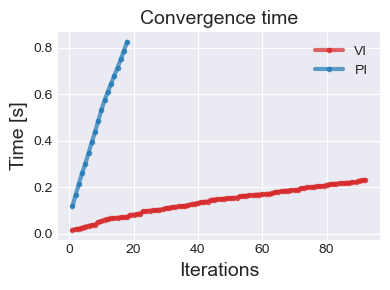

In [240]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(vi_Iterations,vi_time,label="VI",color='tab:red', marker='.',linewidth=3, alpha=0.7)
plt.plot(pi_Iterations,pi_time,label="PI",color='tab:blue',marker='.', linewidth=3, alpha=0.7)
plt.title("Convergence time",fontsize=14)
plt.xlabel("Iterations",fontsize=14)
plt.ylabel("Time [s]",fontsize=14)
plt.tight_layout()
plt.legend()
plt.savefig(save_folder+"fr_vi_pi_time.pdf")



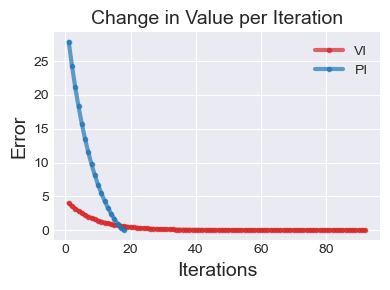

In [243]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(vi_Iterations,vi_dQ,label="VI",color='tab:red', marker='.',linewidth=3, alpha=0.7)
plt.plot(pi_Iterations,pi_dQ,label="PI",color='tab:blue',marker='.', linewidth=3, alpha=0.7)
plt.title("Change in Value per Iteration",fontsize=14)
plt.xlabel("Iterations",fontsize=14)
plt.ylabel("Error",fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig(save_folder+"fr_vi_pi_converence.pdf")


In [96]:
vi.policy[-18:]

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

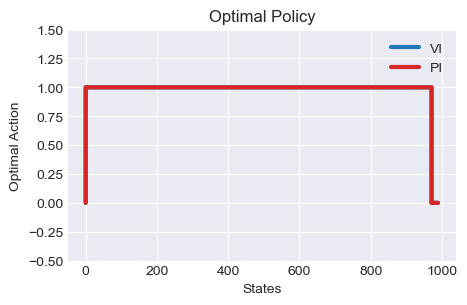

In [120]:
fig, ax = plt.subplots(figsize=(5,3))
plt.ylim(-0.5, 1.5)
plt.step(np.arange(len(vi.policy)),vi.policy,linewidth=3,label="VI",color="tab:blue")
plt.step(np.arange(len(pi.policy)),pi.policy,linewidth=3,label="PI",color="tab:red")
plt.legend()
plt.xlabel("States")
plt.ylabel("Optimal Action")
plt.title("Optimal Policy")
plt.savefig(save_folder+"policy_vis.pdf")

# Q-Learning

In [193]:
0.99999**100000

0.3678776017682465

In [196]:
gamma = 0.99
alphas = [0.1,0.2,0.5,0.9,2.0]
mean_values = []
for alpha in tqdm(alphas):
    ql = QLearning(trans, rewards, gamma,n_iter=100_000,alpha =alpha,alpha_decay=0.99999)
    ql.run()

    mean_v = [stats["Mean V"] for stats in ql.run_stats]
    mean_values.append(mean_v)
    # dQ = [stats["Error"] for stats in ql.run_stats]
    # rewards_stats = [stats["Reward"] for stats in ql.run_stats]
    # Iterations = [stats["Iteration"] for stats in ql.run_stats]
    # time = [stats["Time"] for stats in ql.run_stats]
    
Iterations = [stats["Iteration"] for stats in ql.run_stats]

100%|██████████| 5/5 [01:13<00:00, 14.72s/it]


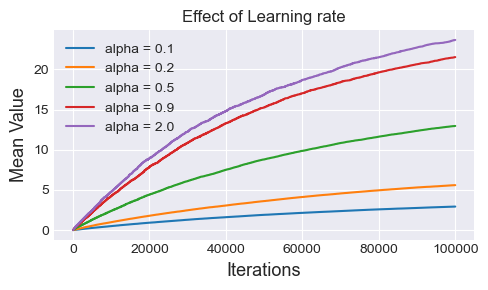

In [197]:
fig, ax = plt.subplots(figsize=(5,3))

for i,alpha in enumerate(alphas):
    plt.plot(Iterations,mean_values[i],label="alpha = {}".format(alpha))

plt.legend()

plt.title("Effect of Learning rate")
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Mean Value",fontsize=13)
plt.tight_layout()
# plt.savefig(save_folder+"q_apha.pdf")

In [211]:
gamma = 0.99
alphas_decays = [0.999,0.9999,0.99999,1.0]
mean_values = []
for decay in tqdm(alphas_decays):
    ql = QLearning(trans, rewards, gamma,n_iter=100_000,alpha =0.2,alpha_decay=decay)
    ql.run()

    mean_v = [stats["Mean V"] for stats in ql.run_stats]
    mean_values.append(mean_v)
    # dQ = [stats["Error"] for stats in ql.run_stats]
    # rewards_stats = [stats["Reward"] for stats in ql.run_stats]
    # Iterations = [stats["Iteration"] for stats in ql.run_stats]
    # time = [stats["Time"] for stats in ql.run_stats]
    
Iterations = [stats["Iteration"] for stats in ql.run_stats]

100%|██████████| 4/4 [00:53<00:00, 13.46s/it]


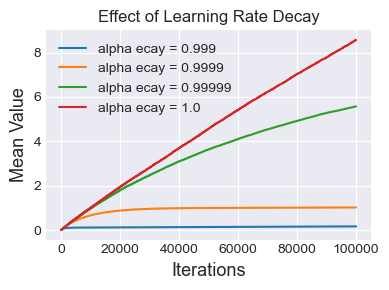

In [212]:
fig, ax = plt.subplots(figsize=(4,3))
for i,decay in enumerate(alphas_decays):
    plt.plot(Iterations,mean_values[i],label="alpha ecay = {}".format(decay))

plt.legend()
plt.title("Effect of Learning Rate Decay")
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Mean Value",fontsize=13)
plt.tight_layout()
plt.savefig(save_folder+"fr_q_apha_decay.pdf")

In [205]:
0.99999**1000000

4.539765980967911e-05

In [213]:
gamma = 0.99
eps_decays = [0.9999,0.99995,0.99999,1.0]
mean_values = []
for decay in tqdm(eps_decays):
    ql = QLearning(trans, rewards, gamma,n_iter=100_000,alpha =0.2,alpha_decay=1.0,epsilon_decay=decay)
    ql.run()

    mean_v = [stats["Mean V"] for stats in ql.run_stats]
    mean_values.append(mean_v)
    # dQ = [stats["Error"] for stats in ql.run_stats]
    # rewards_stats = [stats["Reward"] for stats in ql.run_stats]
    # Iterations = [stats["Iteration"] for stats in ql.run_stats]
    # time = [stats["Time"] for stats in ql.run_stats]

Iterations = [stats["Iteration"] for stats in ql.run_stats]

100%|██████████| 4/4 [00:45<00:00, 11.47s/it]


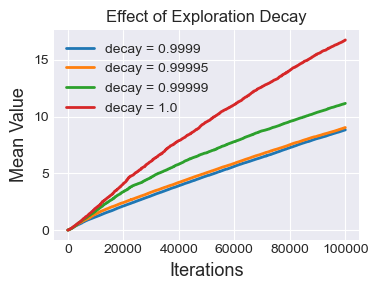

In [215]:
fig, ax = plt.subplots(figsize=(4,3))

for i,decay in enumerate(eps_decays):
    plt.plot(Iterations,mean_values[i],label="decay = {}".format(decay),linewidth=2)

plt.legend()
plt.title("Effect of Exploration Decay")
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Mean Value",fontsize=13)
plt.tight_layout()
plt.savefig(save_folder+"fr_q_epsilon.pdf")

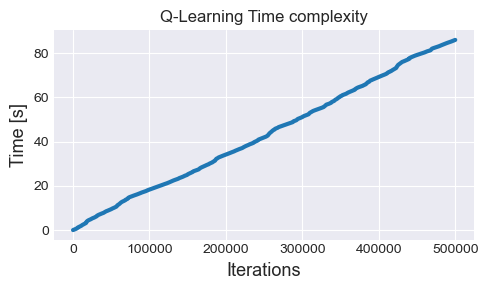

In [127]:
ql = QLearning(trans, rewards, gamma,n_iter=500_000)
ql.run()
time = [stats["Time"] for stats in ql.run_stats]     
Iterations = [stats["Iteration"] for stats in ql.run_stats]
fig, ax = plt.subplots(figsize=(5,3))

plt.plot(Iterations,time,linewidth=3)
plt.title("Q-Learning Time complexity")
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Time [s]",fontsize=13)
plt.tight_layout()
# plt.savefig(save_folder+"q_time.pdf")


# Evaluation

In [219]:
gamma = 0.99
vi = ValueIteration(trans, rewards, gamma)
vi.run()
vi_time = vi.time
print("VI mean V: ", vi.run_stats[-1]["Mean V"])
print("number of iteration: ",vi.iter)
print("time: ",vi.time)
pi = PolicyIteration(trans, rewards, gamma)
pi.run()
pi_time = pi.time
print("PI mean V: ", pi.run_stats[-1]["Mean V"])
print("number of iteration: ",pi.iter)
print("time: ",pi.time)



VI mean V:  29.063370347664677
number of iteration:  92
time:  0.3073768615722656
PI mean V:  47.85339253446561
number of iteration:  18
time:  1.0916202068328857


In [230]:
0.999995**2_000_000

4.539879477167072e-05

In [251]:
ql = QLearning(trans, rewards, gamma, n_iter=500_000,epsilon_decay=1.,alpha = 0.1 , alpha_decay=1)
ql.run()
qi_time = ql.time
print("Q mean V: ", ql.run_stats[-1]["Mean V"])
print("time: ",ql.time)

Q mean V:  30.37698181377467
time:  57.248470067977905


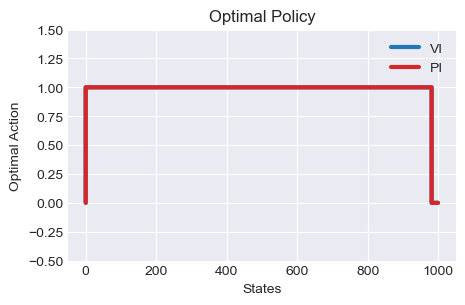

In [223]:
fig, ax = plt.subplots(figsize=(5,3))
plt.ylim(-0.5, 1.5)
plt.step(np.arange(len(vi.policy)),vi.policy,linewidth=3,label="VI",color="tab:blue")
plt.step(np.arange(len(pi.policy)),pi.policy,linewidth=3,label="PI",color="tab:red")
plt.legend()
plt.xlabel("States")
plt.ylabel("Optimal Action")
plt.title("Optimal Policy")
# plt.savefig(save_folder+"policy_vis.pdf")

Text(0.5, 1.0, 'Q-learning Policy')

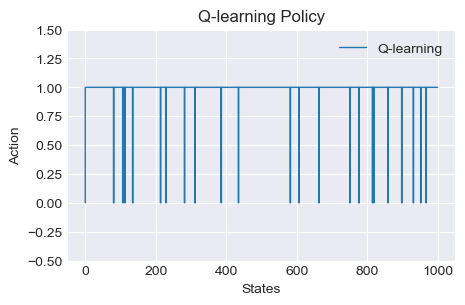

In [253]:
fig, ax = plt.subplots(figsize=(5,3))
plt.ylim(-0.5, 1.5)
plt.step(np.arange(len(ql.policy)),ql.policy,linewidth=1,label="Q-learning",color="tab:blue")
plt.legend()
plt.xlabel("States")
plt.ylabel("Action")
plt.title("Q-learning Policy")
plt.savefig(save_folder+"q_policy_vis.pdf")

In [254]:
Iterations = [stats["Iteration"] for stats in ql.run_stats]
change_v = [stats["Error"] for stats in ql.run_stats]

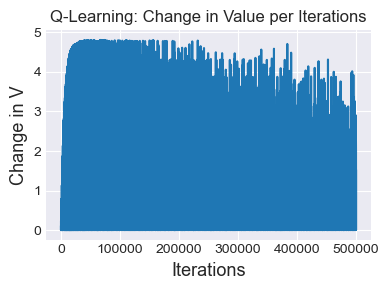

In [256]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(Iterations,change_v)
plt.title("Q-Learning: Change in Value per Iterations")
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Change in V",fontsize=13)
plt.tight_layout()
plt.savefig(save_folder+"fr_q_conv.pdf")

# Small size

In [257]:
fm_size = 25  
trans, rewards = forest(S=fm_size,p=0.1)

In [302]:
gamma = 0.99
vi = ValueIteration(trans, rewards, gamma)
vi.run()
vi_time = vi.time
print("VI mean V: ", vi.run_stats[-1]["Mean V"])
print("number of iteration: ",vi.iter)
print("time: ",vi.time)
pi = PolicyIteration(trans, rewards, gamma)
pi.run()
pi_time = pi.time
print("PI mean V: ", pi.run_stats[-1]["Mean V"])
print("number of iteration: ",pi.iter)
print("time: ",pi.time)

VI mean V:  37.12197016084274
number of iteration:  92
time:  0.022371768951416016
PI mean V:  55.912539030670125
number of iteration:  18
time:  0.07342982292175293


In [156]:
0.9999**100000

4.537723395901116e-05

In [297]:
ql = QLearning(trans, rewards, gamma, n_iter=500_000,epsilon_decay=1.,alpha = 0.1 , alpha_decay=1)
ql.run()
qi_time = ql.time
print("Q mean V: ", ql.run_stats[-1]["Mean V"])
print("time: ",ql.time)

Q mean V:  54.65909034757851
time:  65.4599449634552


In [298]:
Iterations = [stats["Iteration"] for stats in ql.run_stats]
change_v = [stats["Error"] for stats in ql.run_stats]

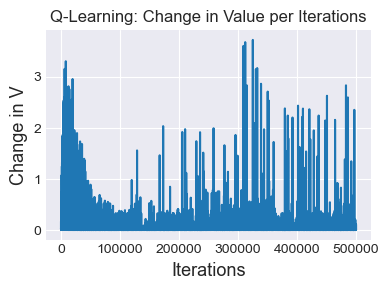

In [306]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(Iterations,change_v)
plt.title("Q-Learning: Change in Value per Iterations")
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Change in V",fontsize=13)
plt.tight_layout()
plt.savefig(save_folder+"fr_small_q_conv.pdf")

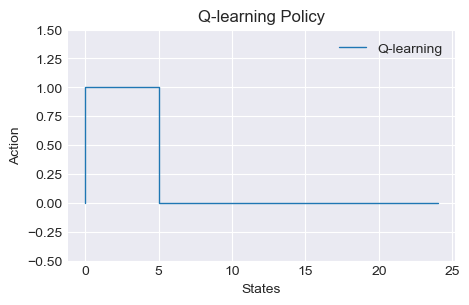

In [300]:
fig, ax = plt.subplots(figsize=(5,3))
plt.ylim(-0.5, 1.5)
plt.step(np.arange(len(ql.policy)),ql.policy,linewidth=1,label="Q-learning",color="tab:blue")
plt.legend()
plt.xlabel("States")
plt.ylabel("Action")
plt.title("Q-learning Policy")
# plt.savefig(save_folder+"fr_small_q_policy_vis.pdf")

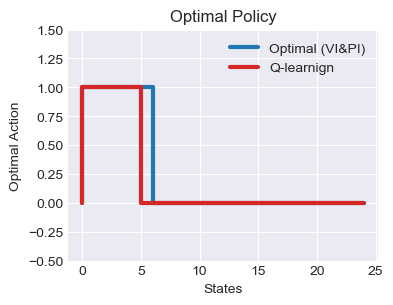

In [305]:
fig, ax = plt.subplots(figsize=(4,3))
plt.ylim(-0.5, 1.5)
plt.step(np.arange(len(vi.policy)),vi.policy,linewidth=3,label="Optimal (VI&PI)",color="tab:blue")
plt.step(np.arange(len(ql.policy)),ql.policy,linewidth=3,label="Q-learnign",color="tab:red")
plt.legend()
plt.xlabel("States")
plt.ylabel("Optimal Action")
plt.title("Optimal Policy")
plt.savefig(save_folder+"fr_small_policy_vis.pdf")